## Individual work after completing CodeCademy's *Build a Machine Learning Model with Python Skill Path* Course

In this project I will be exploring further questions that may arise from the masculinity survey from <a href="https://fivethirtyeight.com/" target = "_blank">FiveThirtyEight</a>.

The questions I will be exploring are:

* Who is more likely to pay on a date? (sexuality, demographic)
* Are certain beliefs or actions linked to more self-described masculine or feminine individuals?
* How do insecurities change as people grow older?


So far, we have already concluded that, when trying to find a more masculine and less masculine cluster from the subquestions of question 7, we end up with a cluster representing the people that are more likely to do all activities and a second cluster representing the people that are less likely to do any activity. So the two clusters are "people who do things" and "people who don't do things". 

The code below shows the progress so far.

In [43]:
import pandas as pd

survey = pd.read_csv("masculinity.csv")

### Mapping text to numerical values

This is important, as KMeans can only be trained on numerical values. 

In [44]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]

for column in cols_to_map:
    survey[column] = survey[column].map({"Never, and not open to it":0, "Never, but open to it":1, "Rarely":2, "Sometimes":3,
                                        "Often":4})
    
for column in cols_to_map:
    print(survey[column].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64
3.0    514
2.0    387
4.0    123
1.0    101
0.0     50
Name: q0007_0002, dtype: int64
3.0    364
2.0    339
0.0    224
4.0    166
1.0     85
Name: q0007_0003, dtype: int64
2.0    505
3.0    371
1.0    121
0.0     78
4.0     43
Name: q0007_0004, dtype: int64
0.0    710
1.0    228
2.0    217
3.0     22
4.0      7
Name: q0007_0005, dtype: int64
4.0    427
3.0    384
2.0    155
0.0    102
1.0     91
Name: q0007_0006, dtype: int64
0.0    1001
1.0      60
3.0      41
4.0      39
2.0      31
Name: q0007_0007, dtype: int64
4.0    482
3.0    344
2.0    216
0.0     93
1.0     43
Name: q0007_0008, dtype: int64
3.0    353
2.0    316
4.0    296
0.0     95
1.0     95
Name: q0007_0009, dtype: int64
1.0    464
0.0    355
2.0    189
3.0     97
4.0     58
Name: q0007_0010, dtype: int64
2.0    456
3.0    339
0.0    187
4.0    111
1.0     75
Name: q0007_0011, dtype: int64


### Training the KMeans classifier object

As we can see, the first cluster_center defines a cluster with the "not doers" the second defines a cluster with the "doers". This means that there isn't a clear difference in the *masculinity* of the answers.

In [45]:
from sklearn.cluster import KMeans

rows_to_cluster = survey.dropna(subset = ["q0007_0001", "q0007_0002", "q0007_0003","q0007_0004","q0007_0005","q0007_0008","q0007_0009"])

classifier = KMeans(n_clusters = 2)
classifier.fit(rows_to_cluster[["q0007_0001", "q0007_0002", "q0007_0003","q0007_0004","q0007_0005","q0007_0008","q0007_0009"]])
print("The first cluster center has higher values: ", classifier.cluster_centers_[0])
print("The second cluster center has lower values: ", classifier.cluster_centers_[1])

The first cluster center has higher values:  [2.84425036 2.81513828 2.84133916 2.39883552 0.69577875 3.0713246
 2.89665211]
The second cluster center has lower values:  [1.87798408 1.84350133 0.84615385 1.72413793 0.56763926 2.63660477
 1.97612732]


## Is there some sort of correlation between self-described masculinity, number of children and education level?


Mapping the educ4 and q001 (education and question one) columns to numbers:

Not employed-retired                  468
Employed, working full-time           467
Employed, working part-time           109
Not employed, NOT looking for work     87
Not employed, looking for work         40
Not employed, student                  17
No answer              


In [46]:
survey["educ4"] = survey["educ4"].map({"High school or less":0, "Some college":1, "College or more":2, "Post graduate degree":4})

survey["q0001"] = survey["q0001"].map({"Very masculine": 3, "Somewhat masculine": 2, "Not very masculine":1, "Not at all masculine":0})

survey["kids"] = survey["kids"].map({"Has children":1, "No children":0})

survey["q0018"] = survey["q0018"].map({"Never":0, "Rarely":1, "Sometimes":2, "Often":3, "Always":4})

#employment status - here I only want to look at people that are either working, not working (but not students) or retired.
survey["q0009"] = survey["q0009"].map({"Not employed, looking for work":0, "Not employed, NOT looking for work":0, "Employed, working part-time":1,
                                      "Employed, working full-time":1, "Not employed-retired":2})

print(survey["educ4"].value_counts())
print(survey["q0001"].value_counts())
print(survey["kids"].value_counts())
print(survey["q0009"].value_counts())

4.0    389
2.0    373
1.0    307
0.0    119
Name: educ4, dtype: int64
2.0    617
3.0    443
1.0     97
0.0     21
Name: q0001, dtype: int64
1.0    818
0.0    365
Name: kids, dtype: int64
1.0    576
2.0    468
0.0    127
Name: q0009, dtype: int64


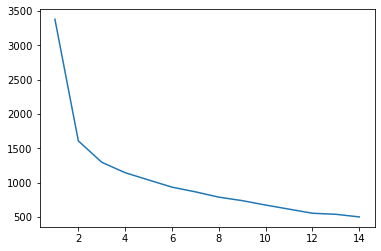

In [47]:
rows_to_cluster_2 = survey.dropna(subset=["educ4", "q0001", "kids", "q0009", "q0018"])

from matplotlib import pyplot as plt

inertia = []
for i in range(1, 15):
    classifier_q0001_educ4 = KMeans(n_clusters = i, random_state = 20)
    classifier_q0001_educ4.fit(rows_to_cluster_2[["educ4", "q0001", "kids", "q0009"]])
    inertia.append(classifier_q0001_educ4.inertia_)

plt.plot(range(1,15), inertia)

Seeing that the optimal number of clusters is 2, I will use that one.

In [48]:
classifier_q0001_educ4 = KMeans(n_clusters = 2, random_state = 20)
classifier_q0001_educ4.fit(rows_to_cluster_2[["educ4", "q0001", "kids", "q0009"]])

print("Cluster center 0: ", classifier_q0001_educ4.cluster_centers_[0])
print("Cluster center 1: ", classifier_q0001_educ4.cluster_centers_[1])

print("The mean of the self-described masculinity measure: ", rows_to_cluster_2["q0001"].mean())

Cluster center 0:  [4.         2.25       0.73076923 1.39285714]
Cluster center 1:  [1.32457293 2.27069645 0.67674113 1.24047306]
The mean of the self-described masculinity measure:  2.264


#### Making sense of the cluster centers

There seemingly appears to be a positive correlation between education level, employment status and having children.

We can only observe a slight negative correlation between all of the above and self-described masculinity. This could indicate that people with lower levels of education have a higher sense of masculinity.


Let's separate the two groups of rows and look whether one is more likely to pay on a date!


In [53]:
cluster_zero_indices_2 = []
cluster_one_indices_2 = []
for i in range(len(classifier_q0001_educ4.labels_)):
    if classifier_q0001_educ4.labels_[i] == 0:
        cluster_zero_indices_2.append(i)
    elif classifier_q0001_educ4.labels_[i] == 1:
        cluster_one_indices_2.append(i)
print(cluster_zero_indices_2)




[5, 6, 9, 14, 19, 22, 23, 26, 27, 31, 38, 40, 44, 47, 48, 54, 59, 61, 64, 65, 69, 70, 73, 74, 76, 82, 84, 85, 93, 97, 98, 99, 104, 105, 106, 107, 109, 112, 129, 132, 143, 146, 151, 152, 153, 156, 160, 161, 163, 164, 165, 167, 171, 183, 184, 185, 186, 191, 193, 195, 196, 198, 204, 205, 210, 213, 217, 220, 221, 223, 224, 226, 227, 233, 234, 237, 244, 253, 263, 264, 268, 271, 274, 275, 277, 281, 286, 287, 291, 296, 310, 313, 319, 320, 321, 322, 323, 324, 325, 326, 329, 333, 335, 336, 337, 338, 342, 346, 352, 357, 360, 363, 369, 373, 377, 379, 380, 384, 388, 391, 395, 396, 403, 404, 405, 410, 412, 417, 420, 422, 423, 429, 431, 435, 437, 439, 441, 445, 448, 452, 454, 459, 460, 463, 466, 467, 468, 470, 475, 484, 488, 492, 497, 501, 502, 503, 506, 509, 511, 513, 520, 522, 523, 525, 527, 531, 534, 536, 542, 547, 548, 551, 552, 554, 557, 565, 566, 568, 571, 574, 575, 576, 579, 580, 581, 583, 585, 589, 591, 594, 595, 596, 597, 602, 603, 605, 606, 608, 616, 618, 620, 622, 623, 625, 631, 634, 635,

Okay, now we can get a feel for the average likelihood of a group paying for a date.

In [50]:
cluster_0_df = rows_to_cluster_2.iloc[cluster_zero_indices_2]
cluster_1_df = rows_to_cluster_2.iloc[cluster_one_indices_2]

print("Cluster 0 stats: \n",cluster_0_df["q0018"].value_counts()/len(cluster_0_df), "\n \n Cluster 0 mean and median: ", 
      cluster_0_df["q0018"].mean(), ", ", cluster_0_df["q0018"].median())
print("\nCluster 1 stats: \n", cluster_1_df["q0018"].value_counts()/len(cluster_1_df), "\n \n Cluster 1 mean and median: ", 
      cluster_1_df["q0018"].mean(), ", ", cluster_1_df["q0018"].median())



Cluster 0 stats: 
 4.0    0.478022
3.0    0.296703
2.0    0.162088
0.0    0.043956
1.0    0.019231
Name: q0018, dtype: float64 
 
 Cluster 0 mean and median:  3.1456043956043955 ,  3.0

Cluster 1 stats: 
 4.0    0.541393
3.0    0.279895
2.0    0.119580
0.0    0.045992
1.0    0.013141
Name: q0018, dtype: float64 
 
 Cluster 1 mean and median:  3.2575558475689883 ,  4.0


## AND THE WINNER IS CLUSTER 1!!!!

It actually turns out that people with a lower level of education and employment have a higher sense of masculinity and are more likely to pay on dates. Although previous data indicates that they are perhaps in a lower demographic group than the others, they still are more willing to pay when on a date. 

Interesting finding...:)